## Support Vector Machine (SVM):

It basically designed to differentiate between two labels.

It is a supervised learning model. Meaning we have to use labeled data to train the model. It is also a discriminative model. The learning algorithms associated with SVM do both classification and regression analysis. 
   
   An SVM model represent the data as points in space, mapped so that the data of the separate labels are divided by an optimal hyperplane. New data are then mapped into that same space and predicted to belong to a label based on the side of the line or plane on which they fall.
   
   SVM model is useful for the training of small datasets for example a dataset with 1000 numbers of data. For big datasets the efficiency of the model decreases.  


### Support Vectors:

Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set, they are what help us build our SVM.

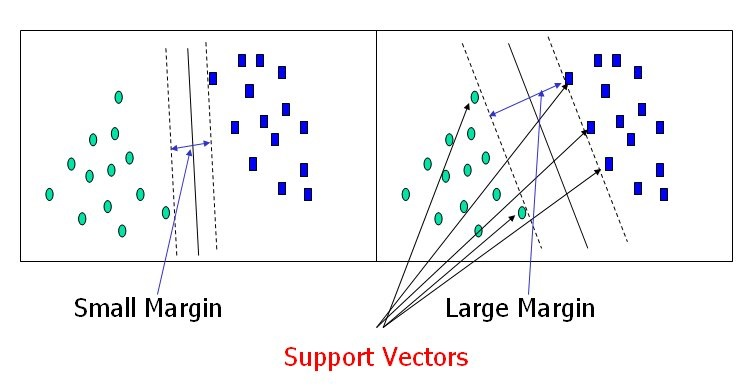

In [1]:
from IPython.display import display, Image
display(Image(filename=r'C:\Users\HP\Desktop\svm.jpg'))

### hyperplane:

It is a linear decision surface that divides the space into two parts.

For a [n] diemenional space the dimention of hyperplane is [n-1].

# Example of Linear SVM

### Algorithim:

#### Stochastic Gradient Descent:

As for the perceptron, we use python 3 and numpy. The svm will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function. For further details see:

Wikipedia - stochastic gradient descent

#### Calculating the Error:

To calculate the error of a prediction we first need to define the objective function of the svm.

#### Hinge Loss Function:


To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$
$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following: $$
c(x, y, f(x))= 
\begin{cases}
    0,&amp; \text{if } y*f(x)\geq 1\\
    1-y*f(x),              &amp; \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.
loss is $1-y*f(x)$ if $y*f(x)$ is negative

#### Objective Function:


As we defined the loss function, we can now define the objective function for the svm:

$$\underset{w}{min}\ \lambda\parallel w\parallel^2 + \ \sum_{i=1}^n\big(1-y_i \langle x_i,w \rangle\big)_+$$
As you can see, our objective of a svm consists of two terms. The first term is a regularizer, the second term the loss. The regularizer balances between margin maximization and loss. To get more informations I advice you the tutorial introduction of the above adviced Schölkopf & Smola book.

Derive the Objective Function
To minimize this function, we need the gradients of this function.

As we have two terms, we will derive them seperately using the sum rule in differentiation.

$$
\frac{\delta}{\delta w_k} \lambda\parallel w\parallel^2 \ = 2 \lambda w_k
$$$$
\frac{\delta}{\delta w_k} \big(1-y_i \langle x_i,w \rangle\big)_+ \ = \begin{cases}
    0,&amp; \text{if } y_i \langle x_i,w \rangle\geq 1\\
    -y_ix_{ik},              &amp; \text{else}
\end{cases}
$$

This means, if we have a misclassified sample $x_i$, respectively $y_i \langle x_i,w \rangle \lt 1$ , we update the weight vector w using the gradients of both terms, if $y_i \langle x_i,w \rangle \geq 1$ we just update w by the gradient of the regularizer. To sum it up, our stochastic gradient descent for the svm looks like this:

if $y_i⟨x_i,w⟩$ &lt; 1: $$
w = w + \eta (y_ix_i - 2\lambda w)
$$ else: $$
w = w + \eta (-2\lambda w)
$$



### Implementation:

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from tqdm import tqdm

In [3]:
iris = load_iris()
X = np.append(np.vstack(np.array([i[0]for i in iris.data]))[:100], np.vstack(np.array([i[1]for i in iris.data]))[:100], axis=1)
y = iris.target[:100]

In [4]:
train_x = np.append(X[:40] , X[60:], axis = 0)
train_y = np.append(y[:40], y[60:])

test_x = X[40:60]
test_y = y[40:60]

In [5]:
class linearSVM:
    
    #initialising the parameters
    def __init__(self, lr=1, epochs=10000):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        # initialising the bias 
        bias = np.vstack(np.ones(len(X)))
        # appending bias to dataset
        X = np.append(X, bias, axis=1) 
        # initialising the weight vactor
        w = np.zeros(len(X[0]))
        
        
        
        
        #splitting the target array into -1 and +1 catagory as it is a binary classifier 
        def normalise_target(array):
            Y = []
            for i in array:
                if i == np.unique(array)[0]:
                    Y.append(-1)
                else:
                    Y.append(1)
            return Y
        Y = normalise_target(y)
        # weight finding algorithim
        for epoch in tqdm(range(1,self.epochs)):
            error = 0
            for i, x in enumerate(X):
                #misclassification
                if Y[i]*np.dot(X[i], w) < 1:
                    #misclassified update for ours weights
                    w = w + self.lr * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                else:
                    #correct classification, update our weights
                    w = w + self.lr * (-2  *(1/epoch)* w)
        self.w = w
    
    def predict(self, arrays):
            if len(np.array(arrays).shape)!=2:
                print('enter a 2d array')
            else:
                pred_arr = []
                for array in arrays:
                    pred_arr.append(np.sign(np.dot(np.array(array), np.array(self.w[:2]))+ self.w[2]))
                return pred_arr
            
    def score(self ,X ,y):
        pred_arr = self.predict(X)
        def normalise_target(array):
            Y = []
            for i in array:
                if i == np.unique(array)[0]:
                    Y.append(-1)
                else:
                    Y.append(1)
            return Y
        Y = normalise_target(y)
        score = np.vstack(pred_arr) == np.vstack(Y)
        score = (len(y) - sum(score))/len(y)
        return 1 - score[0]
        

In [6]:
model = linearSVM(epochs=int(100000))

In [7]:
model.fit(train_x,train_y)

100%|██████████████████████████████████████████████████████████████████████████| 99999/99999 [00:43<00:00, 2312.50it/s]


In [8]:
model.score(test_x, test_y)

0.95